# Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Load data

In [3]:
MODEL_PATH = os.path.join('data', 'models', '5HT')

models = {}

with open(os.path.join(MODEL_PATH, 'sergifs.lmod'), 'rb') as f:
    models['GIF'] = pickle.load(f)
    f.close()
    
with open(os.path.join(MODEL_PATH, 'serkgifs.lmod'), 'rb') as f:
    models['KGIF'] = pickle.load(f)
    f.close()

# Plot GIF parameters

First, we have to pull the GIF coefficients out of the models and put them in a DataFrame.

In [4]:
gif_df = pd.DataFrame(
    columns = ['name', 'gl', 'C', 'El', 'Vt_star', 'DV', 'Vr', 'Tref',
              'eta_vals', 'eta_support', 'eta_coeffs', 'eta_timescales',
              'gamma_vals', 'gamma_support', 'gamma_coeffs', 'gamma_timescales']
)

for mod in models['GIF']:
    
    mod.eta.computeInterpolatedFilter(0.1)
    mod.gamma.computeInterpolatedFilter(0.1)
    
    row = pd.DataFrame({
        'name': mod.name,
        'gl': mod.gl,
        'C': mod.C,
        'El': mod.El,
        'Vt_star': mod.Vt_star,
        'DV': mod.DV,
        'Vr': mod.Vr,
        'Tref': mod.Tref,
        'eta_vals': [mod.eta.filter],
        'eta_support': [mod.eta.filtersupport],
        'eta_coeffs': [mod.eta.getCoefficients()],
        'eta_timescales': [mod.eta.taus],
        'gamma_vals': [mod.gamma.filter],
        'gamma_support': [mod.gamma.filtersupport],
        'gamma_coeffs': [mod.gamma.getCoefficients()],
        'gamma_timescales': [mod.gamma.taus]
    })
    
    gif_df = gif_df.append(row)

gif_df['tau'] = gif_df['C'] / gif_df['gl']
gif_df.reset_index(inplace = True, drop = True)

In [5]:
gif_df.columns

Index([u'C', u'DV', u'El', u'Tref', u'Vr', u'Vt_star', u'eta_coeffs',
       u'eta_support', u'eta_timescales', u'eta_vals', u'gamma_coeffs',
       u'gamma_support', u'gamma_timescales', u'gamma_vals', u'gl', u'name',
       u'tau'],
      dtype='object')

In [6]:
gif_df.head()

,C,DV,El,Tref,Vr,Vt_star,eta_coeffs,eta_support,eta_timescales,eta_vals,gamma_coeffs,gamma_support,gamma_timescales,gamma_vals,gl,name,tau
0,0.099283,6.586309,-64.764617,6.5,-53.563068,-56.745528,"[0.05604362132348767, 0.008871992174767198, -0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[3, 10, 30, 100, 300, 1000, 3000]","[0.09225176057315923, 0.09031195120736106, 0.0...","[-9.22531153661392, 2.019013807156921, 6.40501...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[30, 300, 3000]","[-0.8012787767243204, -0.7714653226216237, -0....",0.001102,DRN307,90.121867
1,0.115062,2.422584,-65.074797,6.5,-56.143612,-49.316295,"[-0.025647336399395388, 0.06894395078046471, -...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[3, 10, 30, 100, 300, 1000, 3000]","[0.08441429720483459, 0.08458764070941391, 0.0...","[93.47022240412502, 10.013206875071937, 0.2472...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[30, 300, 3000]","[103.73065753922424, 103.41626341352544, 103.1...",0.002273,DRN317,50.627482
2,0.093779,3.833261,-63.829690,6.5,-55.896726,-46.503862,"[-0.016252160987829858, 0.017645701866007352, ...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[3, 10, 30, 100, 300, 1000, 3000]","[0.05534420529945827, 0.05565327723715501, 0.0...","[187.3354465044943, 6.630657851929903, -0.0257...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[30, 300, 3000]","[193.94038126753412, 193.31476038270475, 192.6...",0.001659,DRN318,56.524782
3,0.106064,3.665950,-77.766587,6.5,-55.925081,-54.332855,"[0.12237542480629224, -0.029385937341350313, 0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[3, 10, 30, 100, 300, 1000, 3000]","[0.14488753392782916, 0.141093414058785, 0.137...","[93.68587082442676, 47.57043892495727, 0.39453...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[30, 300, 3000]","[141.6508437717761, 141.32321011354722, 140.99...",0.001480,DRN320,71.662466
4,0.057332,4.502793,-59.007351,6.5,-50.661982,-52.838575,"[0.08995434561399508, -0.01010723669906919, 0....","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[3, 10, 30, 100, 300, 1000, 3000]","[0.12704752178093243, 0.12411013911132997, 0.1...","[8.589347966715538, 7.0046897566754, 0.0368107...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[30, 300, 3000]","[15.63084846374337, 15.59992923499403, 15.5691...",0.001347,DRN324,42.552241


Here we can see how the data is laid out. Scalar parameters have their own cells, but the spike triggered filters are stored as lists. The ID of each cell is also stored.

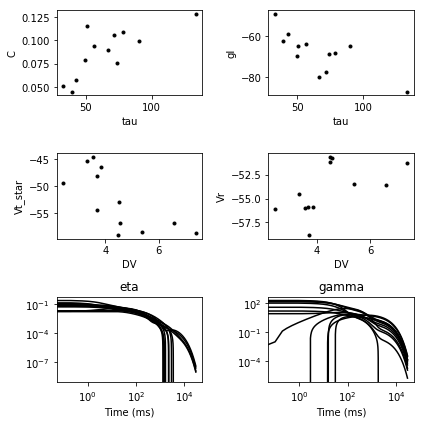

In [7]:
plt.figure(figsize = (6, 6))

spec_outer = gs.GridSpec(3, 2)

plt.subplot(spec_outer[0, 0])
plt.plot(gif_df['tau'], gif_df['C'], 'k.')
plt.ylabel('C')
plt.xlabel('tau')

plt.subplot(spec_outer[0, 1])
plt.plot(gif_df['tau'], gif_df['El'], 'k.')
plt.ylabel('gl')
plt.xlabel('tau')

plt.subplot(spec_outer[1, 0])
plt.plot(gif_df['DV'], gif_df['Vt_star'], 'k.')
plt.ylabel('Vt_star')
plt.xlabel('DV')

plt.subplot(spec_outer[1, 1])
plt.plot(gif_df['DV'], gif_df['Vr'], 'k.')
plt.ylabel('Vr')
plt.xlabel('DV')

plt.subplot(spec_outer[2, 0])
plt.title('eta')
for i in range(gif_df.shape[0]):
    plt.loglog(gif_df['eta_support'][i], gif_df['eta_vals'][i], 'k-')
plt.xlabel('Time (ms)')

plt.subplot(spec_outer[2, 1])
plt.title('gamma')
for i in range(gif_df.shape[0]):
    plt.loglog(gif_df['gamma_support'][i], gif_df['gamma_vals'][i], 'k-')
plt.xlabel('Time (ms)')

plt.tight_layout()
plt.show()

# Plot KGIF parameters

Pull out parameters and put them in a DataFrame. Few extra parameters for the K currents this time.

In [8]:
kgif_df = pd.DataFrame(
    columns = ['name', 'gl', 'C', 'El', 'Vt_star', 'DV', 'Vr', 'Tref',
              'eta_vals', 'eta_support', 'eta_coeffs', 'eta_timescales',
              'gamma_vals', 'gamma_support', 'gamma_coeffs', 'gamma_timescales']
)

for mod in models['KGIF']:
    
    mod.eta.computeInterpolatedFilter(0.1)
    mod.gamma.computeInterpolatedFilter(0.1)
    
    row = pd.DataFrame({
        'name': mod.name,
        'gl': mod.gl,
        'C': mod.C,
        'El': mod.El,
        'Vt_star': mod.Vt_star,
        'DV': mod.DV,
        'Vr': mod.Vr,
        'Tref': mod.Tref,
        'gbar_K1': mod.gbar_K1,
        'gbar_K2': mod.gbar_K2,
        'h_tau': mod.h_tau,
        'eta_vals': [mod.eta.filter],
        'eta_support': [mod.eta.filtersupport],
        'eta_coeffs': [mod.eta.getCoefficients()],
        'eta_timescales': [mod.eta.taus],
        'gamma_vals': [mod.gamma.filter],
        'gamma_support': [mod.gamma.filtersupport],
        'gamma_coeffs': [mod.gamma.getCoefficients()],
        'gamma_timescales': [mod.gamma.taus]
    })
    
    kgif_df = kgif_df.append(row)

kgif_df['tau'] = kgif_df['C'] / kgif_df['gl']
kgif_df.reset_index(inplace = True, drop = True)

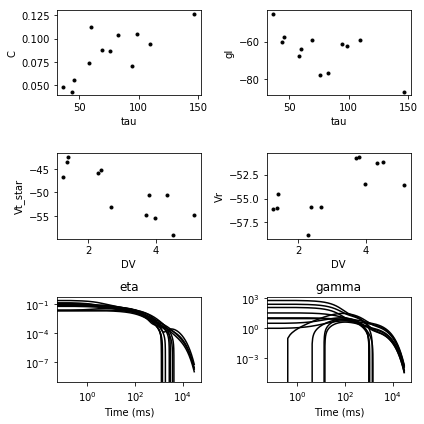

In [9]:
plt.figure(figsize = (6, 6))

spec_outer = gs.GridSpec(3, 2)

plt.subplot(spec_outer[0, 0])
plt.plot(kgif_df['tau'], kgif_df['C'], 'k.')
plt.ylabel('C')
plt.xlabel('tau')

plt.subplot(spec_outer[0, 1])
plt.plot(kgif_df['tau'], kgif_df['El'], 'k.')
plt.ylabel('gl')
plt.xlabel('tau')

plt.subplot(spec_outer[1, 0])
plt.plot(kgif_df['DV'], kgif_df['Vt_star'], 'k.')
plt.ylabel('Vt_star')
plt.xlabel('DV')

plt.subplot(spec_outer[1, 1])
plt.plot(kgif_df['DV'], kgif_df['Vr'], 'k.')
plt.ylabel('Vr')
plt.xlabel('DV')

plt.subplot(spec_outer[2, 0])
plt.title('eta')
for i in range(kgif_df.shape[0]):
    plt.loglog(kgif_df['eta_support'][i], kgif_df['eta_vals'][i], 'k-')
plt.xlabel('Time (ms)')

plt.subplot(spec_outer[2, 1])
plt.title('gamma')
for i in range(kgif_df.shape[0]):
    plt.loglog(kgif_df['gamma_support'][i], kgif_df['gamma_vals'][i], 'k-')
plt.xlabel('Time (ms)')

plt.tight_layout()
plt.show()

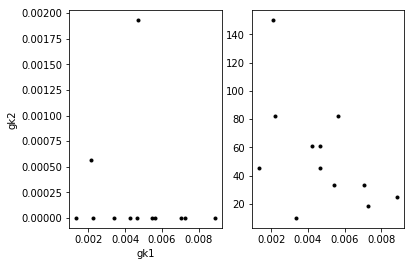

In [10]:
plt.figure()

plt.subplot(121)
plt.plot(kgif_df['gbar_K1'], kgif_df['gbar_K2'], 'k.')
plt.xlabel('gk1')
plt.ylabel('gk2')

plt.subplot(122)
plt.plot(kgif_df['gbar_K1'], kgif_df['h_tau'], 'k.')

plt.show()

Looks like the model does a decent job at estimating the parameters of the A-type K current. gk2 (Kslow) is almost always set to zero, probably because of a contaminating effect of Na near threshold.